In [1]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def lettura_vendite(quartiere) : 
    with open('/home/francesco/Codici/Computazionale/DC2/vendite/'+quartiere + '.html' , 'r') as f : 

        contents = f.read()

        soup = BeautifulSoup(contents, 'lxml')

    text = soup.get_text()
    Data = []
    Prezzi = []
    Quartiere = []
    Mesi = [ 'Marzo', 'Febbraio' , 'Gennaio' ,'Dicembre' ,'Novembre' ,'Ottobre','Settembre' ,'Agosto' ,'Luglio' , 'Giugno' ,'Maggio','Aprile' ]
    Mese_Numerico = [3 , 2 , 1 , 12 , 11 , 10, 9, 8, 7, 6, 5, 4]
    for j in range(10) : 
        for i in range(len(Mesi)) :
            mese_cercato = Mesi[i]
            ricerca = text.find(mese_cercato)
            if ricerca != np.nan :
                mese = []
                anno = []
                valore = []
                for a in range(len(mese_cercato)):
                    mese.append(text[ricerca+a])

                for b in range(4) : 
                    anno.append(text[ricerca+len(mese)+b+1])

                for c in range(6) : 
                    valore.append(text[ricerca+len(mese)+len(anno)+c+1])

                dep =ricerca+len(mese)+len(anno)+7
                mese = ''.join(mese)
                anno = ''.join(anno)
                if ''.join(valore) != 'N/AN/A' :
                    if valore[5] == ' ' : lippo = 1000 * int(valore[0]) + 100 * int(valore[2]) + 10* int(valore[3]) + int(valore[4])
                    if valore[5] != ' ' : lippo = 10000 * int(valore[0]) + 1000 * int(valore[2]) + 100 * int(valore[3]) + 10 * int(valore[4]) + int(valore[5])
                else : valore = np.nan

                Data.append(anno+' '+ str(Mese_Numerico[i]))
                Quartiere.append(quartiere)
                Prezzi.append(lippo)
                text = text[dep:]

    Data = pd.to_datetime(Data , format='%Y %m')
    Prezzi = pd.to_numeric(Prezzi)
    Lambrate = {'Mese' : Data , 'Prezzi' : Prezzi , 'Quartiere' : Quartiere }
    Lambrate = pd.DataFrame(Lambrate)

    return Lambrate

def lettura_affitti(quartiere) : 
    with open('/home/francesco/Codici/Computazionale/DC2/affitti/' + quartiere + '.html' , 'r') as f : 

        contents = f.read()

        soup = BeautifulSoup(contents, 'lxml')

    text = soup.get_text()
    Data = []
    Prezzi = []
    Quartiere = []
    Mesi = [ 'Marzo', 'Febbraio' , 'Gennaio' ,'Dicembre' ,'Novembre' ,'Ottobre','Settembre' ,'Agosto' ,'Luglio' , 'Giugno' ,'Maggio','Aprile' ]
    Mese_Numerico = [3 , 2 , 1 , 12 , 11 , 10, 9, 8, 7, 6, 5, 4]
    for j in range(10) : 
        for i in range(len(Mesi)) :
            mese_cercato = Mesi[i]
            ricerca = text.find(mese_cercato)
            if ricerca != np.nan :
                mese = []
                anno = []
                valore = []
                for a in range(len(mese_cercato)):
                    mese.append(text[ricerca+a])

                for b in range(4) : 
                    anno.append(text[ricerca+len(mese)+b+1])

                for c in range(4) : 
                    valore.append(text[ricerca+len(mese)+len(anno)+c+1])

                dep =ricerca+len(mese)+len(anno)+5
                mese = ''.join(mese)
                anno = ''.join(anno)
                if ''.join(valore) != 'N/AN' :
                        lippo = 10 *  int(valore[0]) + int(valore[1]) + 0.1 * int(valore[3]) 
                else : lippo = np.nan

                Data.append(anno+' '+ str(Mese_Numerico[i]))
                Quartiere.append(quartiere)
                Prezzi.append(lippo)
                text = text[dep:]

    Data = pd.to_datetime(Data , format='%Y %m')
    Prezzi = pd.to_numeric(Prezzi)
    Lambrate = {'Mese' : Data , 'Prezzi' : Prezzi , 'Quartiere' : Quartiere }
    Lambrate = pd.DataFrame(Lambrate)

    return Lambrate

In [3]:
Baggio = lettura_vendite('Baggio')
Centro_Storico = lettura_vendite('CentroStorico')
Cermenate = lettura_vendite('Cermenate')
Certosa = lettura_vendite('Certosa')
CittaStudi = lettura_vendite('CittaStudi')
Comasina = lettura_vendite('Comasina')
Corvetto = lettura_vendite('Corvetto')
Famagosta = lettura_vendite('Famagosta')
Fiera = lettura_vendite('Fiera')
Forlanini = lettura_vendite('Forlanini')
Garibaldi = lettura_vendite('Garibaldi')
Greco = lettura_vendite('Greco')
Navigli = lettura_vendite('Navigli')
PortaVittoria = lettura_vendite('PortaVittoria')
Ripamonti = lettura_vendite('Ripamonti')
SanSiro = lettura_vendite('SanSiro')
ViaAlba = lettura_vendite('ViaAlba')

In [4]:
Quartieri = [ Baggio , Centro_Storico , Cermenate , CittaStudi , Certosa , Comasina , Corvetto , Famagosta , Fiera , Forlanini , Garibaldi, Greco , Navigli , PortaVittoria , Ripamonti , SanSiro , ViaAlba]

In [5]:
Affitto_Baggio = lettura_affitti('Baggio')
Affitto_Centro_Storico = lettura_affitti('CentroStorico')
Affitto_Cermenate = lettura_affitti('Cermenate')
Affitto_Certosa = lettura_affitti('Certosa')
Affitto_CittaStudi = lettura_affitti('CittaStudi')
Affitto_Comasina = lettura_affitti('Comasina')
Affitto_Corvetto = lettura_affitti('Corvetto')
Affitto_Famagosta = lettura_affitti('Famagosta')
Affitto_Fiera = lettura_affitti('Fiera')
Affitto_Forlanini = lettura_affitti('Forlanini')
Affitto_Garibaldi = lettura_affitti('Garibaldi')
Affitto_Greco = lettura_affitti('Greco')
Affitto_Navigli = lettura_affitti('Navigli')
Affitto_PortaVittoria = lettura_affitti('PortaVittoria')
Affitto_Ripamonti = lettura_affitti('Ripamonti')
Affitto_SanSiro = lettura_affitti('SanSiro')
Affitto_ViaAlba = lettura_affitti('ViaAlba')

In [6]:
Quartieri = [Baggio , Centro_Storico , Cermenate  , Certosa , Comasina , Corvetto , Famagosta , Fiera , Forlanini , Garibaldi, Greco , Navigli , PortaVittoria , Ripamonti , SanSiro , ViaAlba]
Correlazioni = []
nomi = []
for i in Quartieri : 
    Correlazioni.append(i.Prezzi.corr(CittaStudi.Prezzi))
    nomi.append(i.Quartiere[0])

Correlazioni = {'Correlation' : Correlazioni, 'Neighborhood' : nomi}
Correlazioni = pd.DataFrame(Correlazioni)

<AxesSubplot: xlabel='Neighborhood'>

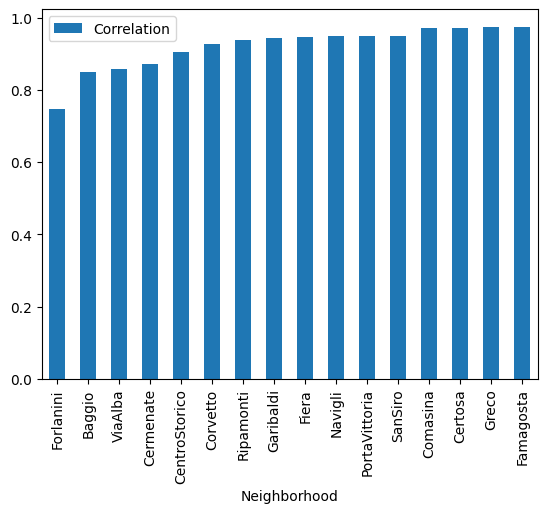

In [7]:
Correlazioni.sort_values(by='Correlation', inplace=True)
Correlazioni_Buone = Correlazioni[Correlazioni['Correlation'] > 0.9]
Correlazioni.plot.bar(x = 'Neighborhood', y = 'Correlation')

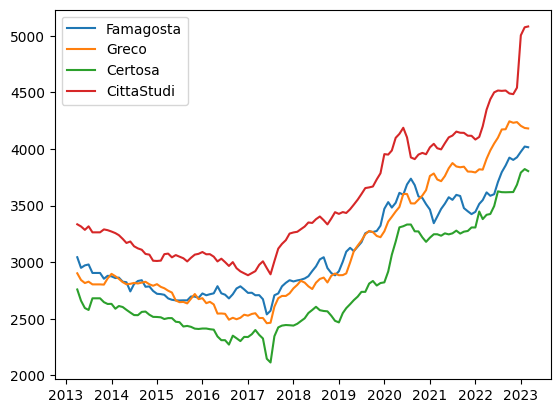

In [15]:
plt.plot(Famagosta.Mese , Famagosta.Prezzi , label = 'Famagosta')
plt.plot(Greco.Mese , Greco.Prezzi , label = 'Greco')
plt.plot(Certosa.Mese , Certosa.Prezzi , label = 'Certosa')
plt.plot(CittaStudi.Mese , CittaStudi.Prezzi, label = 'CittaStudi')
plt.legend()

In [17]:
def scarto(Dataset) : 
    scarto = 0
    for i in range(len(CittaStudi.Prezzi)) : 
        scarto += (CittaStudi.Prezzi[i] - Dataset.Prezzi[i])**2

    return scarto

In [30]:
scarti = []
for i in Quartieri : scarti.append(scarto(i))
scarti = {'Quartieri' : nomi , 'Scarto' : scarti}
scarti = pd.DataFrame(scarti)

<AxesSubplot: xlabel='Quartieri'>

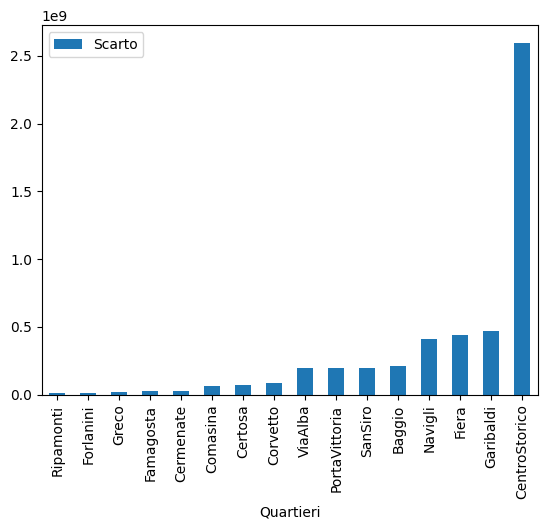

In [39]:
scarti.sort_values('Scarto' , inplace=True , ignore_index=True)
scarti.plot.bar(x = 'Quartieri' , y = 'Scarto')